# K Means Clustering with Python

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Create some Data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

## Visualize Data

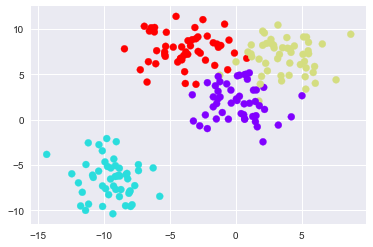

In [4]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Creating the Clusters

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=4)

In [16]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
kmeans.cluster_centers_

array([[-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-4.13591321,  7.95389851]])

In [18]:
kmeans.labels_

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0, 0,
       1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 0, 1, 3, 3, 3, 0, 2,
       3, 0, 1, 0, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0, 1, 2, 2,
       1, 2, 0, 1, 0, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3, 0, 1, 1, 1,
       1, 0, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 3, 3, 2, 1,
       2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3, 0, 1, 1, 3, 2, 3,
       2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2, 0, 3, 2, 2, 2, 0, 2,
       0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 2, 0, 3, 2, 2, 1, 2, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2, 1, 0])

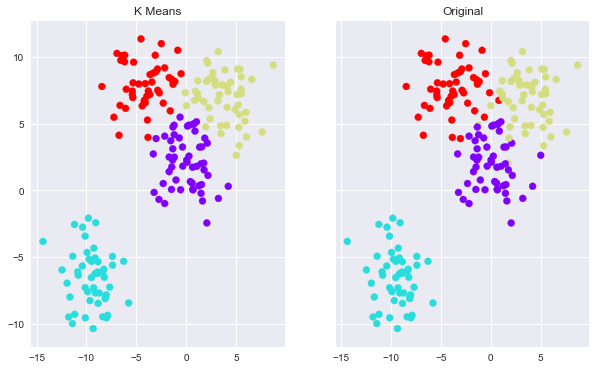

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

You can use a different scoring metric, such as ``adjusted_rand_score``, which is invariant to permutations of the labels:

In [ ]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, labels)

## Some Notable Clustering Routines

The following are two well-known clustering algorithms. 

- `sklearn.cluster.KMeans`: <br/>
    The simplest, yet effective clustering algorithm. Needs to be provided with the
    number of clusters in advance, and assumes that the data is normalized as input
    (but use a PCA model as preprocessor).
- `sklearn.cluster.MeanShift`: <br/>
    Can find better looking clusters than KMeans but is not scalable to high number of samples.
- `sklearn.cluster.DBSCAN`: <br/>
    Can detect irregularly shaped clusters based on density, i.e. sparse regions in
    the input space are likely to become inter-cluster boundaries. Can also detect
    outliers (samples that are not part of a cluster).
- `sklearn.cluster.AffinityPropagation`: <br/>
    Clustering algorithm based on message passing between data points.
- `sklearn.cluster.SpectralClustering`: <br/>
    KMeans applied to a projection of the normalized graph Laplacian: finds
    normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.
- `sklearn.cluster.Ward`: <br/>
    Ward implements hierarchical clustering based on the Ward algorithm,
    a variance-minimizing approach. At each step, it minimizes the sum of
    squared differences within all clusters (inertia criterion).

Of these, Ward, SpectralClustering, DBSCAN and Affinity propagation can also work with precomputed similarity matrices.

<img src="figures/cluster_comparison.png" width="900">

# Hierarchical clustering

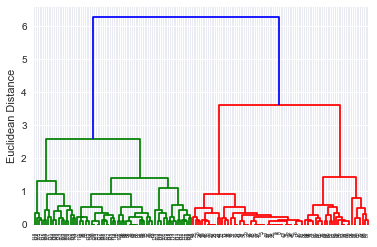

In [2]:
from sklearn import datasets
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

clusters = linkage(X, 
                   metric='euclidean',
                   method='complete')

dendr = dendrogram(clusters)

plt.ylabel('Euclidean Distance');

# Density-based clustering

Another useful approach to clustering is *Density-based Spatial Clustering of Applications with Noise* (DBSCAN). In essence, we can think of DBSCAN as an algorithm that divides the dataset into subgroup based on dense regions of point.

In DBSCAN, we distinguish between 3 different "points":

- Core points: A core point is a point that has at least a minimum number of other points (MinPts) in its radius epsilon.
- Border points: A border point is a point that is not a core point, since it doesn't have enough MinPts in its neighborhood, but lies within the radius epsilon of a core point.
- Noise points: All other points that are neither core points nor border points.

A nice feature about DBSCAN is that we don't have to specify a number of clusters upfront. However, it requires the setting of additional hyperparameters such as the value for MinPts and the radius epsilon.

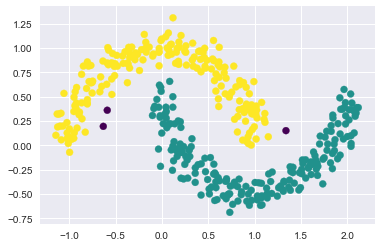

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=400,
                  noise=0.1,
                  random_state=1)

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2,
            min_samples=10,
            metric='euclidean')
prediction = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=prediction, cmap="viridis");